### Chapter 3 
### Classification
Get MNIST

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    print('Import Error')

Count group by digits 

In [4]:
len(mnist.target)
for i in range(0,10):
    print ( i, list(mnist.target).count(i))

0 6903
1 7877
2 6990
3 7141
4 6824
5 6313
6 6876
7 7293
8 6825
9 6958


MNIST data arrays

In [5]:
X, y = mnist['data'], mnist['target']
X.shape


(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from skimage import io
import random

#### Display Images - One at a time and 100 at a time.

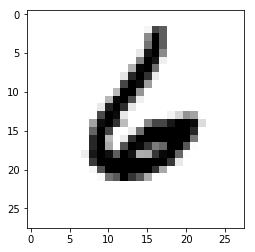

6


In [8]:
index = int(random.randint(0,70000))
some_digit = X[index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation  = 'nearest')
#plt.axis('off')
plt.show()
print(y[index])

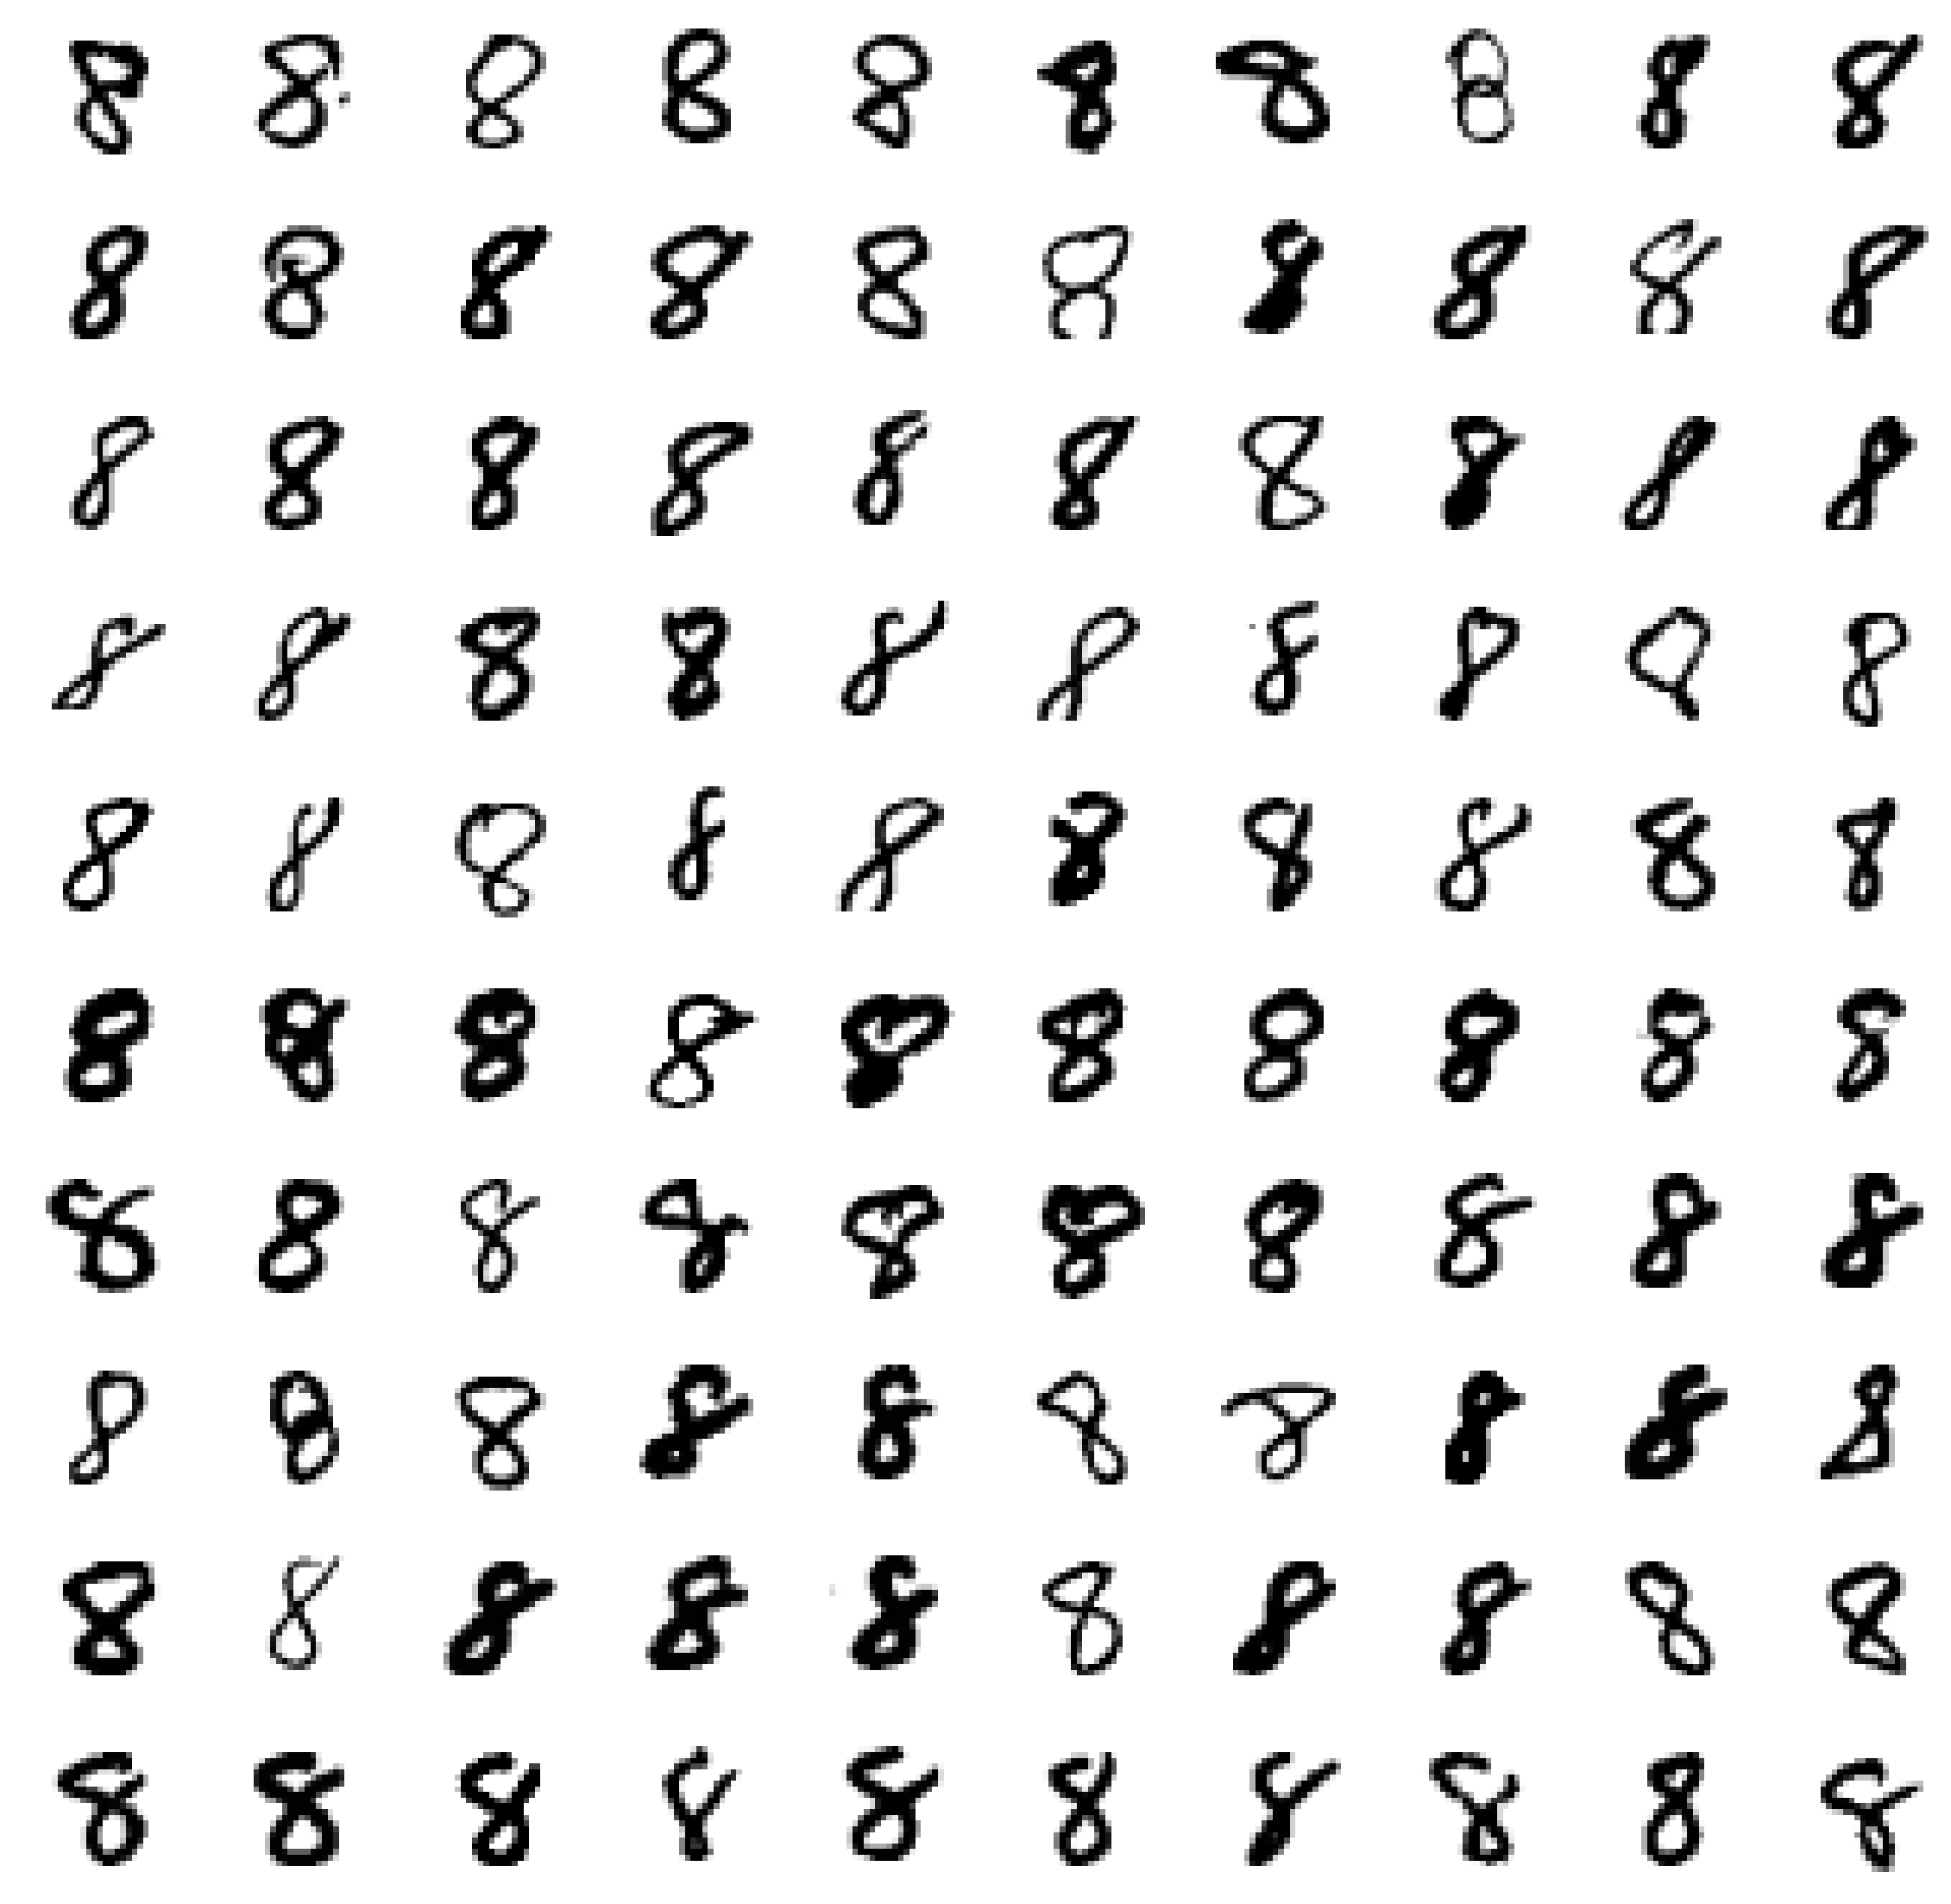

In [9]:
fig=plt.figure(figsize=(40, 40))
offset = 50000
for index in range (offset+1,offset+101):
    some_digit = X [index]
    some_digit_image = some_digit.reshape(28,28)
    fig.add_subplot(10, 10, index-offset)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation  = 'nearest')
    plt.axis('off')
plt.show()  

### Splitting into train and test set.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle the data

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

### Training the Binary Classifier (Stochastic Gradient Descent)

In [12]:
len(y_train)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([X[65000],X[65002]])

array([False, False])

#### Performance Measure of Binary Classifier

In [15]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5 , scoring='accuracy')

array([0.96125323, 0.95383333, 0.95125   , 0.96333333, 0.96041337])

Never5Classifier Example

In [16]:
np.zeros((len(X[65000]),1), dtype=bool)

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)


In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')


array([0.90905, 0.90885, 0.91105])

### Confusion Matrix
* Question What does clean prediction mean here.

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 )

confusion_matrix(y_train_5, y_train_pred)

array([[51067,  3512],
       [  650,  4771]])

In [19]:
precision_score(y_train_5, y_train_pred)

0.5759990341663649

In [20]:
recall_score(y_train_5, y_train_pred)

0.8800959232613909

In [21]:
f1_score(y_train_5, y_train_pred)

0.6962930531231757

#### Precesion Recall curve

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3 , method = 'decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve(y_train_5, y_scores)

In [24]:
def plot_precesion_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    #plt.xlim([-700000, 700000])

In [25]:
len(y_train_5)

60000

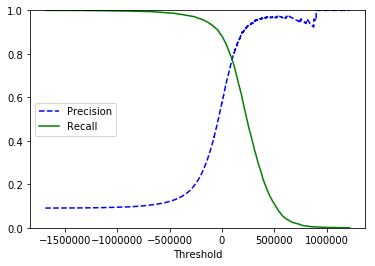

In [26]:
plot_precesion_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

#### Precision vs Recall curve

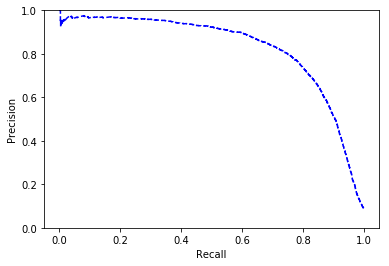

In [27]:
plt.plot(recalls,precisions, 'b--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0,1])
plt.show()

### The ROC Curve, F1-Score
* Precision - 
$$ \frac{TP}{TP + FP} $$
* TPR - True Positive Rate (Same as Recall,Sensitivity) - 
$$ \frac{TP}{TP + FN} $$

* FPR - False Positive Rate -
$$ \frac{FP}{TN + FP} $$
* TNR - True Negative Rate(Specificity) -
$$ \frac{TN}{TN + FP} $$

* F1-Score
$$ \frac{TP}{TP + \frac{FN + FP}{2}}$$

### ROC Curve

In [28]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr , thresholds = roc_curve(y_train_5, y_scores)

In [30]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


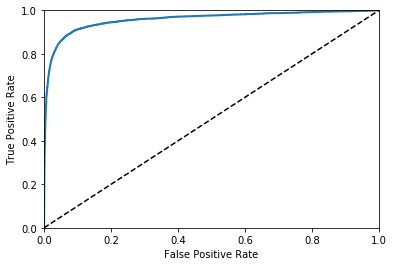

In [31]:
plot_roc_curve(fpr,tpr)
plt.show()

AUC Score

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9580765088279045

In [33]:
#print(y_scores.min())
#print(y_scores.max())


### RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest_clf =  RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3 , method = 'predict_proba')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
y_scrores_forest = y_probas_forest[:,1] # What does [:,1] does

In [37]:
type(y_probas_forest)

numpy.ndarray

In [38]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scrores_forest)

#### ROC curve for comparision between SGD and RandomForestClassifier

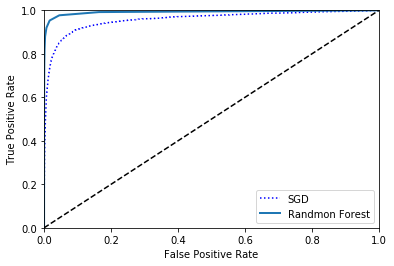

In [39]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Randmon Forest")
plt.legend(loc = "lower right")
plt.show()
         

AUC score of RandomForest classifier

In [40]:
roc_auc_score(y_train_5, y_scrores_forest)

0.9921940701543261

In [41]:
y_train_pred_rfc = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3 )

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
confusion_matrix(y_train_5, y_train_pred_rfc)

array([[54504,    75],
       [  991,  4430]])

In [43]:
precision_score(y_train_5, y_train_pred_rfc)

0.9833518312985572

In [44]:
recall_score(y_train_5, y_train_pred_rfc)

0.8171923999262128

In [45]:
f1_score(y_train_5, y_train_pred_rfc)

0.8926052790650816

## Multiclass Classification

* One vs All - Train one digit classifiers and then when prrdicting pass the new image via all classifiers to find out new image class
* One vs One - Train only based on a pair of digits and then run across the pair to get maximum score.

In [46]:
sgd_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
image = io.imread('/Users/amitjha/Pictures/digit_1_new.png')
image = image.flatten()


In [48]:
forest_clf =  RandomForestClassifier(random_state=42)

forest_clf.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
import random

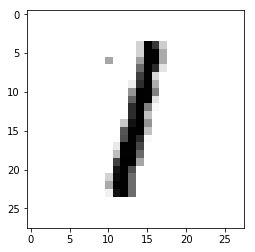

Actual 1
prediction [1]


In [50]:
index = int(random.randint(60000,70000))
some_digit = X[index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation  = 'nearest')
#plt.axis('off')
plt.show()
print('Actual', y[index])
print('prediction', sgd_clf.predict([some_digit]))

### Prediction on my own Images

In [51]:
from skimage import io
import matplotlib.pyplot  as plt
import os

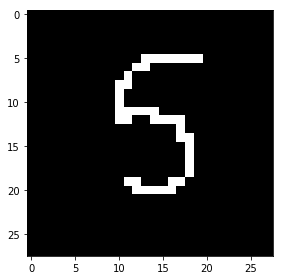

In [111]:
image = io.imread('../datasets/digits/digit_5_trans.png')
#io.imshow(image)
image = image[:,:,3]
image.shape
io.imshow(image)
#image

In [112]:

image = image.flatten()
print(forest_clf.predict([image]))
print(sgd_clf.predict([image]))

[5]
[5]


#### After the manipulation

### classes, decision_functions and proba
The classifiers have attributes associated with them to find more details about the score and probability of predictions. Examples are as shown below

In [56]:
forest_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [57]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [58]:
sgd_clf.decision_function([image]) # Wrongly classifies 1 as 8

array([[ 202457.71466531, -439792.31465498, -121791.18256378,
        -114452.34352686, -197425.2624466 ,  -85112.60865213,
        -264104.72472435,    4412.32402519,  -79822.01479024,
        -103583.47169218]])

In [59]:
forest_clf.predict_proba([image])

array([[0.4, 0. , 0. , 0.1, 0.1, 0.2, 0. , 0.2, 0. , 0. ]])

#### Feature Scaling to improve performance

In [60]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.84378124, 0.87214361, 0.87613142])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.90806839, 0.91119556, 0.91078662])

### Error Analysis and Confusion Matrix

In [62]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx =  confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5738,    2,   20,   10,   11,   41,   47,   11,   40,    3],
       [   1, 6473,   45,   26,    6,   39,    7,    9,  122,   14],
       [  59,   40, 5326,  105,   85,   24,   89,   51,  161,   18],
       [  49,   38,  146, 5325,    3,  248,   34,   57,  139,   92],
       [  24,   27,   30,   12, 5394,    9,   51,   25,   78,  192],
       [  70,   36,   31,  172,   79, 4614,  110,   27,  183,   99],
       [  35,   25,   43,    2,   46,   85, 5631,    6,   44,    1],
       [  24,   22,   70,   30,   56,   10,    4, 5793,   15,  241],
       [  52,  151,   65,  148,   13,  157,   54,   29, 5038,  144],
       [  45,   31,   24,   92,  166,   33,    2,  210,   77, 5269]])

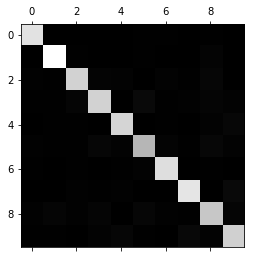

In [63]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

In [64]:
row_sums = conf_mx.sum(axis =  1, keepdims = True)
norm_conf_mx = conf_mx/row_sums

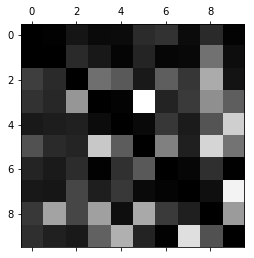

In [65]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [66]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [67]:
cl_a ,cl_b = 3,5


In [68]:
X_aa = X_train[ (y_train == cl_a) & (y_train_pred  == cl_a)]
X_ab = X_train[ (y_train == cl_a) & (y_train_pred  == cl_b)]
X_ba = X_train[ (y_train == cl_b) & (y_train_pred  == cl_a)]
X_bb = X_train[ (y_train == cl_b) & (y_train_pred  == cl_b)]


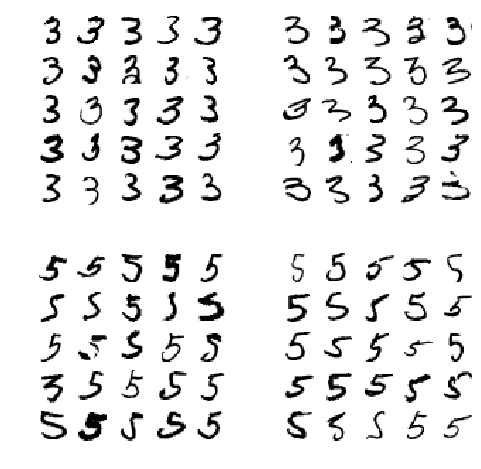

In [69]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)


### Multi Label Classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
y_train_large = (y_train >= 7)
y_train_odd  = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]


In [72]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn_clf.predict([image])

array([[ True,  True]])

### Multi Output Classification

In [74]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod =  X_train
y_test_mod = X_test

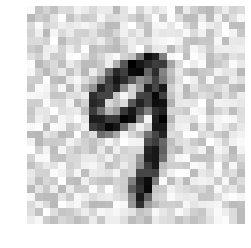

In [75]:
plot_digit(X_train_mod[1])

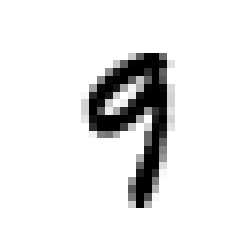

In [76]:
plot_digit(X_train[1])

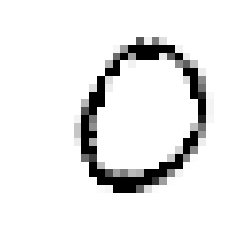

In [77]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[1]])
plot_digit(clean_digit)

### Exercises
#### 1. MNIST Classifier with 97% accuracy


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [{'n_neighbors': [3,5,10], 'weights': ['uniform', 'distance']}]
knn_clf = KNeighborsClassifier(n_neighbors = 10)
grid_search = GridSearchCV(knn_clf, param_grid, scoring = 'neg_mean_squared_error')


In [80]:
# grid_search.fit(X_train, y_train)

1. MNIST train data expansion with shifting digits by 1 pixel in each direction
1. Titanic Dataset
1. Spam Classifier

In [81]:
#model = grid_search.best_estimator_

In [82]:
#model = knn_clf

In [83]:
#model.fit(X_train, y_train)

In [84]:
#y_predict  = model.predict(X_test)

In [85]:
#equal = y_predict == y_test

In [86]:
#np.count_nonzero(equal)/len(y_test)

The `GridSearchCV` with `KNeighborsClassifier` takes too long to run(hours!). I opted to run KNN with default hyperparams which gave accuracy of 96.88% on test test.

#### 2. Exercise-2 Shifting images and augmenting to train set

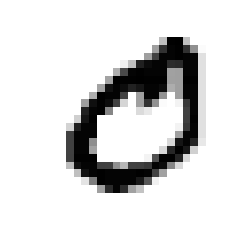

In [87]:
#orig_image# = io.imshow(X[1].reshape(28,28))
plot_digit(X[1])

In [88]:
from scipy.ndimage.interpolation import shift

In [89]:
shifted = shift(X[1].reshape(28,28), [20,10],cval=0)

In [90]:
def shift_image(image, direction = None):
    shift_list = []
    if direction == 'right':
        shift_list= [0,1]
    elif direction == 'down':
        shift_list= [1,0]
    elif direction == 'left':
        shift_list= [0,-1]
    elif direction == 'up':
        shift_list= [-1,0]
    else:
        shift_list= [0,0]
    return shift(image, shift_list, cval=0)

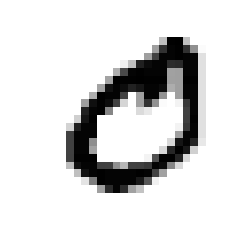

In [91]:
plot_digit(X[1])

In [92]:
type(y_train)

numpy.ndarray

In [99]:
idx = 0
shifted_images = []
shifted_ys = [];
for image in X_train:
    #print(idx)
    temp = image.reshape(28,28)
    right = shift_image(temp,'right').flatten()
    left = shift_image(temp,'left').flatten()
    up = shift_image(temp,'up').flatten()
    down = shift_image(temp,'down').flatten()
    shifted_images.extend([right,left,up,down])
    shifted_ys.extend([y_train[idx],y_train[idx],y_train[idx],y_train[idx]])
    idx = idx + 1
    #print(idx)
print('done')

done


In [100]:
shifted_images = np.array(shifted_images)
shifted_ys = np.array(shifted_ys)

In [101]:
X_train_combined = np.concatenate((X_train, shifted_images))
y_train_combined = np.concatenate((y_train, shifted_ys))

In [102]:
shuffle_index = np.random.permutation(len(X_train_combined))
X_train_combined, y_train_combined = X_train_combined[shuffle_index],y_train_combined[shuffle_index]

In [103]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_combined, y_train_combined)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
y_predict  = knn_clf.predict(X_test)

In [105]:
equal = y_predict == y_test

In [106]:
np.count_nonzero(equal)/len(y_test)

0.9754